In [231]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [232]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [233]:
NUM_CLASSES = 9

# Dataset reading

In [234]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [235]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [237]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [238]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_20 (Dropout)        (None, 42)                0         
                                                                 
 dense_30 (Dense)            (None, 20)                860       
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [239]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [240]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [241]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 1s - loss: 2.4952 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 38ms/step - loss: 2.4230 - accuracy: 0.0619 - val_loss: 2.2400 - val_accuracy: 0.0317
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.3491 - accuracy: 0.0625
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 2.3536 - accuracy: 0.0619 - val_loss: 2.2096 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2697 - accuracy: 0.0703
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 2.2959 - accuracy: 0.0673 - val_loss: 2.1828 - val_accuracy: 0.0053
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2918 - accuracy: 0.0781
Epoch 4:

5/5 [==============================] - 0s 18ms/step - loss: 1.8421 - accuracy: 0.3080 - val_loss: 1.7158 - val_accuracy: 0.3228
Epoch 29/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.7894 - accuracy: 0.3203
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 1.8324 - accuracy: 0.3062 - val_loss: 1.7026 - val_accuracy: 0.3228
Epoch 30/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.8097 - accuracy: 0.2969
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 1.8110 - accuracy: 0.3044 - val_loss: 1.6898 - val_accuracy: 0.3228
Epoch 31/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.8510 - accuracy: 0.2891
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.8226 - accuracy: 0.2814 - val_loss: 1.

Epoch 56/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.5743 - accuracy: 0.4297
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 1.5817 - accuracy: 0.3593 - val_loss: 1.4087 - val_accuracy: 0.3757
Epoch 57/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.5731 - accuracy: 0.3359
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 1.5392 - accuracy: 0.3628 - val_loss: 1.3985 - val_accuracy: 0.3915
Epoch 58/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.5243 - accuracy: 0.3672
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 1.5291 - accuracy: 0.3841 - val_loss: 1.3885 - val_accuracy: 0.3862
Epoch 59/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.5041 - accuracy: 0.4297
Epoch

1/5 [=====>........................] - ETA: 0s - loss: 1.3506 - accuracy: 0.4219
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 1.3655 - accuracy: 0.4212 - val_loss: 1.2133 - val_accuracy: 0.5185
Epoch 84/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.4753 - accuracy: 0.3516
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.3384 - accuracy: 0.4425 - val_loss: 1.2093 - val_accuracy: 0.5132
Epoch 85/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3869 - accuracy: 0.3906
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 1.3516 - accuracy: 0.4460 - val_loss: 1.2032 - val_accuracy: 0.4921
Epoch 86/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3434 - accuracy: 0.4141
Epoch 86: saving mo

1/5 [=====>........................] - ETA: 0s - loss: 1.3076 - accuracy: 0.4219
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.2868 - accuracy: 0.4442 - val_loss: 1.0977 - val_accuracy: 0.5397
Epoch 111/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3148 - accuracy: 0.4297
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.2717 - accuracy: 0.4637 - val_loss: 1.0939 - val_accuracy: 0.5344
Epoch 112/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3013 - accuracy: 0.4531
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.2712 - accuracy: 0.4814 - val_loss: 1.0912 - val_accuracy: 0.5450
Epoch 113/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3145 - accuracy: 0.4688
Epoch 113: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.1395 - accuracy: 0.5469
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 1.1742 - accuracy: 0.4991 - val_loss: 1.0103 - val_accuracy: 0.5820
Epoch 138/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1530 - accuracy: 0.5469
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.2086 - accuracy: 0.4726 - val_loss: 1.0078 - val_accuracy: 0.6032
Epoch 139/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1222 - accuracy: 0.5234
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.1870 - accuracy: 0.4956 - val_loss: 1.0083 - val_accuracy: 0.5926
Epoch 140/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1865 - accuracy: 0.4141
Epoch 140: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0744 - accuracy: 0.5625
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 1.1339 - accuracy: 0.5292 - val_loss: 0.9679 - val_accuracy: 0.6190
Epoch 165/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1479 - accuracy: 0.4531
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 1.1645 - accuracy: 0.5080 - val_loss: 0.9644 - val_accuracy: 0.6085
Epoch 166/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1278 - accuracy: 0.5078
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 1.1234 - accuracy: 0.5434 - val_loss: 0.9590 - val_accuracy: 0.6138
Epoch 167/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1817 - accuracy: 0.4375
Epoch 167: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.1706 - accuracy: 0.5000
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.1095 - accuracy: 0.5274 - val_loss: 0.9053 - val_accuracy: 0.6349
Epoch 192/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.2335 - accuracy: 0.5391
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 1.1332 - accuracy: 0.5327 - val_loss: 0.9044 - val_accuracy: 0.6402
Epoch 193/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1086 - accuracy: 0.4844
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.1054 - accuracy: 0.5115 - val_loss: 0.9046 - val_accuracy: 0.6455
Epoch 194/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1114 - accuracy: 0.5078
Epoch 194: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0863 - accuracy: 0.5625
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 1.0810 - accuracy: 0.5540 - val_loss: 0.8506 - val_accuracy: 0.7196
Epoch 219/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0895 - accuracy: 0.5781
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.1161 - accuracy: 0.5310 - val_loss: 0.8526 - val_accuracy: 0.7407
Epoch 220/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0755 - accuracy: 0.6172
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 1.0926 - accuracy: 0.5522 - val_loss: 0.8554 - val_accuracy: 0.7354
Epoch 221/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1719 - accuracy: 0.4844
Epoch 221: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0541 - accuracy: 0.5469
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 1.0850 - accuracy: 0.5292 - val_loss: 0.8146 - val_accuracy: 0.7354
Epoch 246/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9999 - accuracy: 0.5938
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 1.0514 - accuracy: 0.5646 - val_loss: 0.8144 - val_accuracy: 0.7407
Epoch 247/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9517 - accuracy: 0.6016
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 1.0121 - accuracy: 0.5770 - val_loss: 0.8149 - val_accuracy: 0.7460
Epoch 248/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9846 - accuracy: 0.5938
Epoch 248: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0110 - accuracy: 0.5547
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 1.0155 - accuracy: 0.5788 - val_loss: 0.8028 - val_accuracy: 0.7249
Epoch 273/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0922 - accuracy: 0.5312
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.0357 - accuracy: 0.5540 - val_loss: 0.8035 - val_accuracy: 0.7249
Epoch 274/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0894 - accuracy: 0.5078
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.0427 - accuracy: 0.5363 - val_loss: 0.8009 - val_accuracy: 0.7302
Epoch 275/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9668 - accuracy: 0.5859
Epoch 275: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.9871 - accuracy: 0.5703
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.0185 - accuracy: 0.5434 - val_loss: 0.7751 - val_accuracy: 0.7354
Epoch 300/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0613 - accuracy: 0.5859
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 0.9921 - accuracy: 0.5982 - val_loss: 0.7745 - val_accuracy: 0.7513
Epoch 301/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9761 - accuracy: 0.5781
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 1.0562 - accuracy: 0.5504 - val_loss: 0.7705 - val_accuracy: 0.7619
Epoch 302/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9861 - accuracy: 0.6094
Epoch 302: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.9393 - accuracy: 0.6172
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 1.0075 - accuracy: 0.5752 - val_loss: 0.7501 - val_accuracy: 0.7989
Epoch 327/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9015 - accuracy: 0.6094
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 0.9825 - accuracy: 0.5965 - val_loss: 0.7484 - val_accuracy: 0.8095
Epoch 328/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9119 - accuracy: 0.6641
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 0.9762 - accuracy: 0.6035 - val_loss: 0.7465 - val_accuracy: 0.8095
Epoch 329/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9933 - accuracy: 0.5859
Epoch 329: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0409 - accuracy: 0.5781
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 1.0042 - accuracy: 0.5487 - val_loss: 0.7277 - val_accuracy: 0.7937
Epoch 354/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8964 - accuracy: 0.5938
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 0.9303 - accuracy: 0.6106 - val_loss: 0.7317 - val_accuracy: 0.7884
Epoch 355/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8137 - accuracy: 0.6797
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.9766 - accuracy: 0.5947 - val_loss: 0.7340 - val_accuracy: 0.7513
Epoch 356/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9653 - accuracy: 0.5391
Epoch 356: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0301 - accuracy: 0.5547
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 1.0031 - accuracy: 0.5628 - val_loss: 0.7056 - val_accuracy: 0.7989
Epoch 381/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9010 - accuracy: 0.5938
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 0.9745 - accuracy: 0.5770 - val_loss: 0.7099 - val_accuracy: 0.7884
Epoch 382/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8966 - accuracy: 0.6250
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.9580 - accuracy: 0.6053 - val_loss: 0.7124 - val_accuracy: 0.7989
Epoch 383/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9785 - accuracy: 0.6172
Epoch 383: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0493 - accuracy: 0.5234
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.9703 - accuracy: 0.5823 - val_loss: 0.6773 - val_accuracy: 0.8095
Epoch 408/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0806 - accuracy: 0.4766
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 0.9773 - accuracy: 0.5487 - val_loss: 0.6794 - val_accuracy: 0.8201
Epoch 409/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9679 - accuracy: 0.6250
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 0.9467 - accuracy: 0.6177 - val_loss: 0.6796 - val_accuracy: 0.8042
Epoch 410/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9292 - accuracy: 0.6250
Epoch 410: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.8691 - accuracy: 0.6328
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 11ms/step - loss: 0.9349 - accuracy: 0.6177 - val_loss: 0.6652 - val_accuracy: 0.8095
Epoch 435/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9524 - accuracy: 0.5781
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 0.8856 - accuracy: 0.6177 - val_loss: 0.6596 - val_accuracy: 0.8095
Epoch 436/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9863 - accuracy: 0.6172
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.9492 - accuracy: 0.6088 - val_loss: 0.6543 - val_accuracy: 0.8254
Epoch 437/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9328 - accuracy: 0.5859
Epoch 437: sa

In [242]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.8201


In [243]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [244]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.0100240e-05 1.7143800e-06 8.5242248e-01 6.1667229e-06 2.2565164e-08
 1.0019518e-04 2.5461822e-09 4.9806640e-05 1.4736949e-01]
2


# Confusion matrix

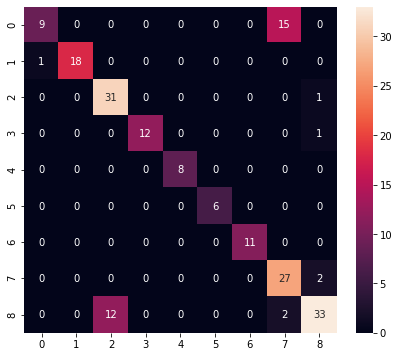

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.38      0.53        24
           1       1.00      0.95      0.97        19
           2       0.72      0.97      0.83        32
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        11
           7       0.61      0.93      0.74        29
           8       0.89      0.70      0.79        47

    accuracy                           0.82       189
   macro avg       0.90      0.87      0.87       189
weighted avg       0.85      0.82      0.81       189



In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [246]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [247]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\coral\AppData\Local\Temp\tmpcd09qk7h\assets


INFO:tensorflow:Assets written to: C:\Users\coral\AppData\Local\Temp\tmpcd09qk7h\assets


6688

# Inference test

In [248]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [249]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [250]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [251]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [252]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0100236e-05 1.7143815e-06 8.5242242e-01 6.1667288e-06 2.2565247e-08
 1.0019536e-04 2.5461866e-09 4.9806637e-05 1.4736955e-01]
2
